### Деревья решений

#### Обучение модели регрессии

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing = fetch_california_housing()
df = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']], columns=california_housing.feature_names + ['MedHouseVal'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Пропусков в данных нет

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Нормализуем признак Population, потому что в этом признаке значения гораздо больше чем у других признаков.

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
cleaned_df = df.copy()

cleaned_df[['Population']] = MinMaxScaler().fit_transform(df[['Population']])

In [7]:
cleaned_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.023599,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,0.009894,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,0.028140,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,0.020684,2.123209,39.43,-121.32,0.847


In [8]:
model = LinearRegression()

In [9]:
statistic = [['model', 'Score_Test', 'Score_Train']]

def train(df, model, model_name):
  X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],
                                                    df[df.columns[-1]], test_size=0.2, random_state=2)
  model.fit(X_train, Y_train)    

  Score_Test = model.score(X_test, Y_test)
  Score_Train = model.score(X_train, Y_train)

  print("Test Score: ", Score_Test)
  print("Train Score: ", Score_Train)
  statistic.append([model_name, Score_Test, Score_Train])

In [10]:
train(cleaned_df, model, 'LinearRegression')

Test Score:  0.6013853272055152
Train Score:  0.6068205998456941


#### Обучение дерева решений

In [11]:
decision_tree_model_without_params = DecisionTreeRegressor(random_state=10)
train(cleaned_df, decision_tree_model_without_params, 'DecisionTree without params')

Test Score:  0.5861284759683112
Train Score:  1.0


Посмотрим на наше дерево, для удобства было выведено дерево глубинной 3

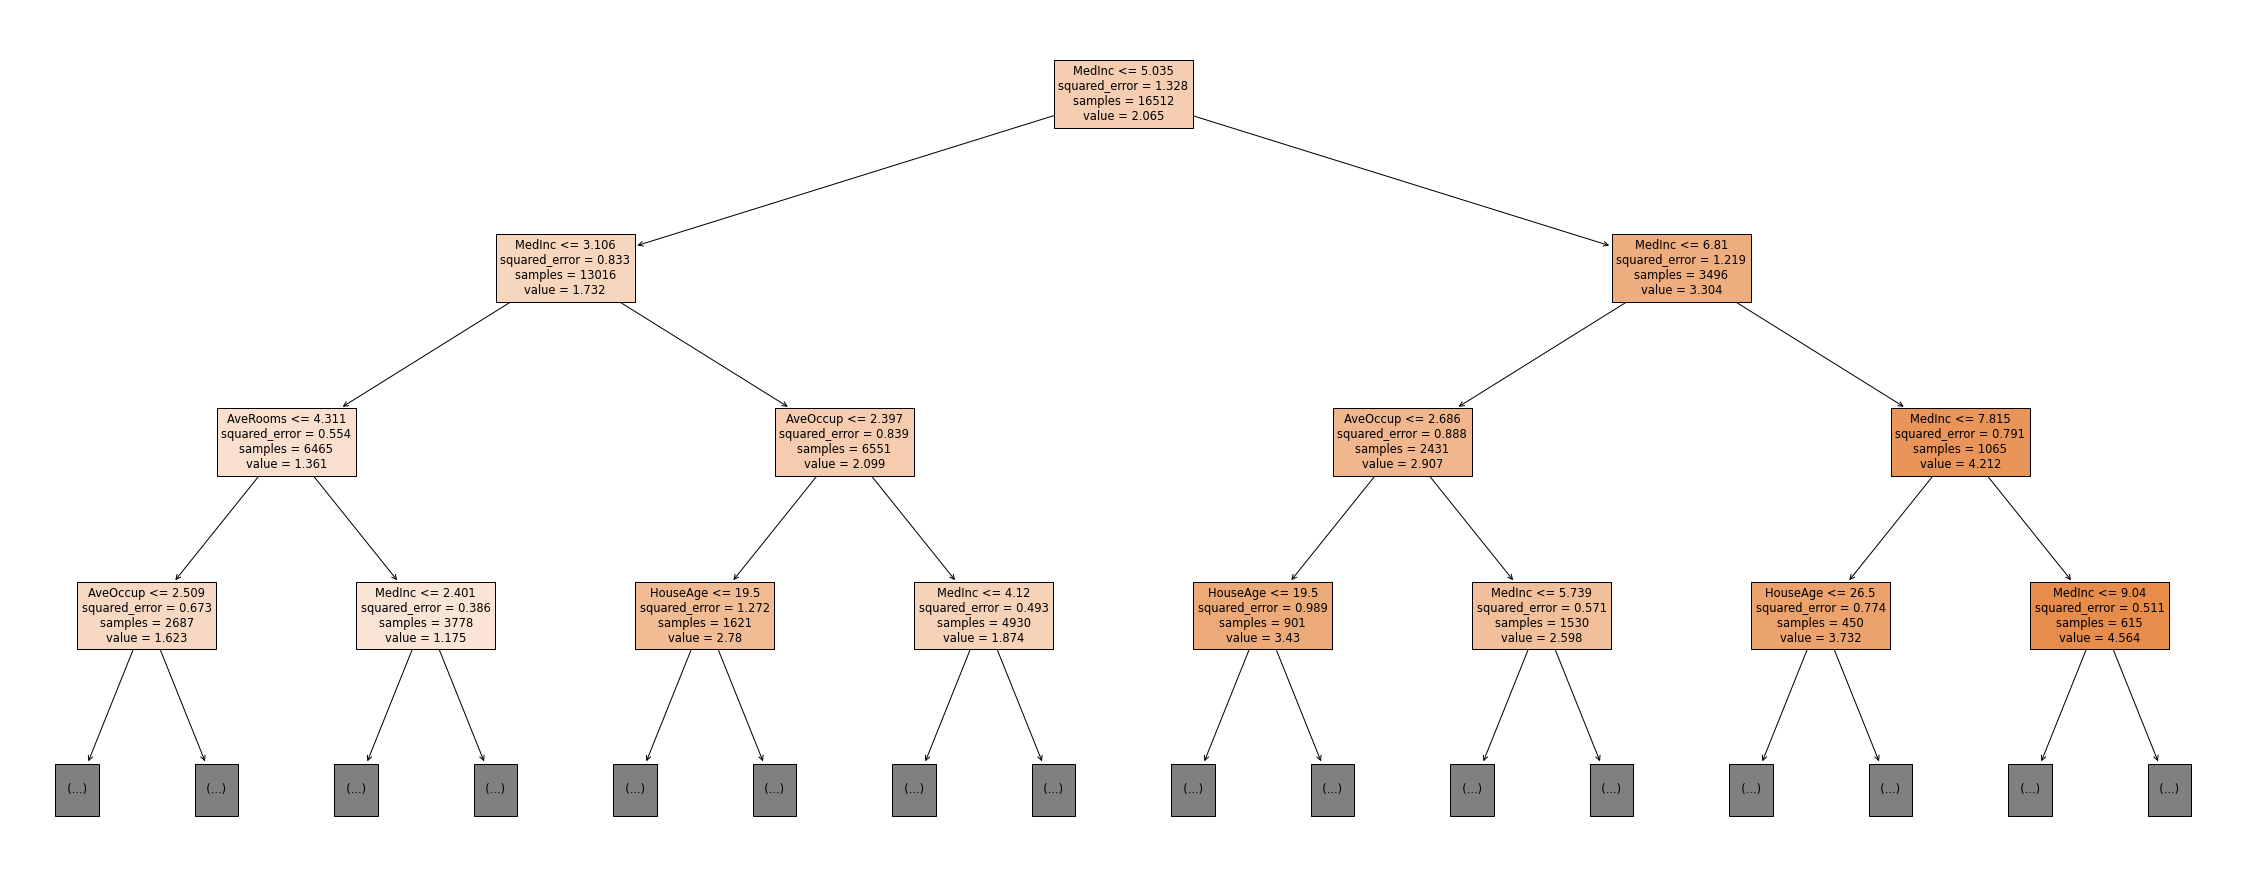

In [12]:
plt.figure(figsize=(40,16))
_ = tree.plot_tree(decision_tree_model_without_params, 
                   feature_names=list(cleaned_df.columns)[:-1],  
                   class_names=list(cleaned_df.columns)[-1],
                   max_depth=3,
                   filled=True)

Посмотрим на важность признаков. Видно что MedInc используется для построения дерева в более чем 50% случаев, что не очень хорошо

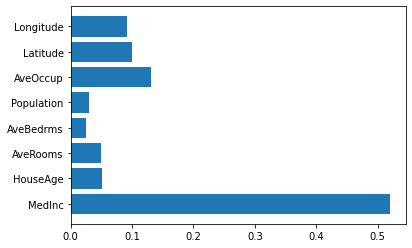

In [13]:
plt.barh(np.arange(len(decision_tree_model_without_params.feature_importances_)), decision_tree_model_without_params.feature_importances_)
plt.yticks(np.arange(len(list(cleaned_df.columns)[:-1])), list(cleaned_df.columns)[:-1])
plt.show()

Попробуем оптимизировать дерево. Выберем оптимальную глубину. Судя по всему нам нужна глубина равная 9, такое дерево дает максимальные значения метрики на тесте.

In [14]:
for i in range(1, 11):
  decision_tree_model_with_max_depth_limit = DecisionTreeRegressor(max_depth=i, random_state=10)
  train(cleaned_df, decision_tree_model_with_max_depth_limit, f'DecisionTree with max {i} depth limit')
  print('Max depth:', i)
  print('-----------------------------------------')

Test Score:  0.3069856295181179
Train Score:  0.3107004712159428
Max depth: 1
-----------------------------------------
Test Score:  0.43823446938580124
Train Score:  0.4490552846187206
Max depth: 2
-----------------------------------------
Test Score:  0.524541111857762
Train Score:  0.5352416417148143
Max depth: 3
-----------------------------------------
Test Score:  0.572652770760911
Train Score:  0.5847327016079287
Max depth: 4
-----------------------------------------
Test Score:  0.6094854552954491
Train Score:  0.6323530349157612
Max depth: 5
-----------------------------------------
Test Score:  0.6424498354725977
Train Score:  0.6749036615023651
Max depth: 6
-----------------------------------------
Test Score:  0.6648904649085765
Train Score:  0.7154084208515179
Max depth: 7
-----------------------------------------
Test Score:  0.6856274225068222
Train Score:  0.7596854763539038
Max depth: 8
-----------------------------------------
Test Score:  0.6862931070451221
Train Sco

Теперь попробуем выбрать оптимальный минимум элементов на листе. При минимальном колличестве листов - 7, имеем максимальное значение метрики дерева. 

In [15]:
for i in range(1, 11):
  decision_tree_model_with_min_leaf_limit = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i, random_state=10)
  train(cleaned_df, decision_tree_model_with_min_leaf_limit, f'DecisionTree with max 9 depth and min {i} leaf limit')
  print('Min leaf:', i)
  print('-----------------------------------------')

Test Score:  0.6862931070451221
Train Score:  0.7980100254308651
Min leaf: 1
-----------------------------------------
Test Score:  0.6944281140137296
Train Score:  0.7965698778157279
Min leaf: 2
-----------------------------------------
Test Score:  0.7012739855376513
Train Score:  0.7947760211822007
Min leaf: 3
-----------------------------------------
Test Score:  0.7027231415716165
Train Score:  0.7921670430191048
Min leaf: 4
-----------------------------------------
Test Score:  0.7046107224180731
Train Score:  0.7898390874020431
Min leaf: 5
-----------------------------------------
Test Score:  0.7048829871137012
Train Score:  0.789177269339083
Min leaf: 6
-----------------------------------------
Test Score:  0.7088728461459329
Train Score:  0.7880724826281336
Min leaf: 7
-----------------------------------------
Test Score:  0.7080752555724901
Train Score:  0.78644709451684
Min leaf: 8
-----------------------------------------
Test Score:  0.7061891009934258
Train Score:  0.784

Построим нашу оптимальную модель

In [16]:
optimal_model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=7, random_state=10)
train(cleaned_df, optimal_model, 'DecisionTree with max 9 depth and min 7 leaf limit')

Test Score:  0.7088728461459329
Train Score:  0.7880724826281336


Получившиеся блоки (из вывода) не сильно отличаются от первоночальной модели

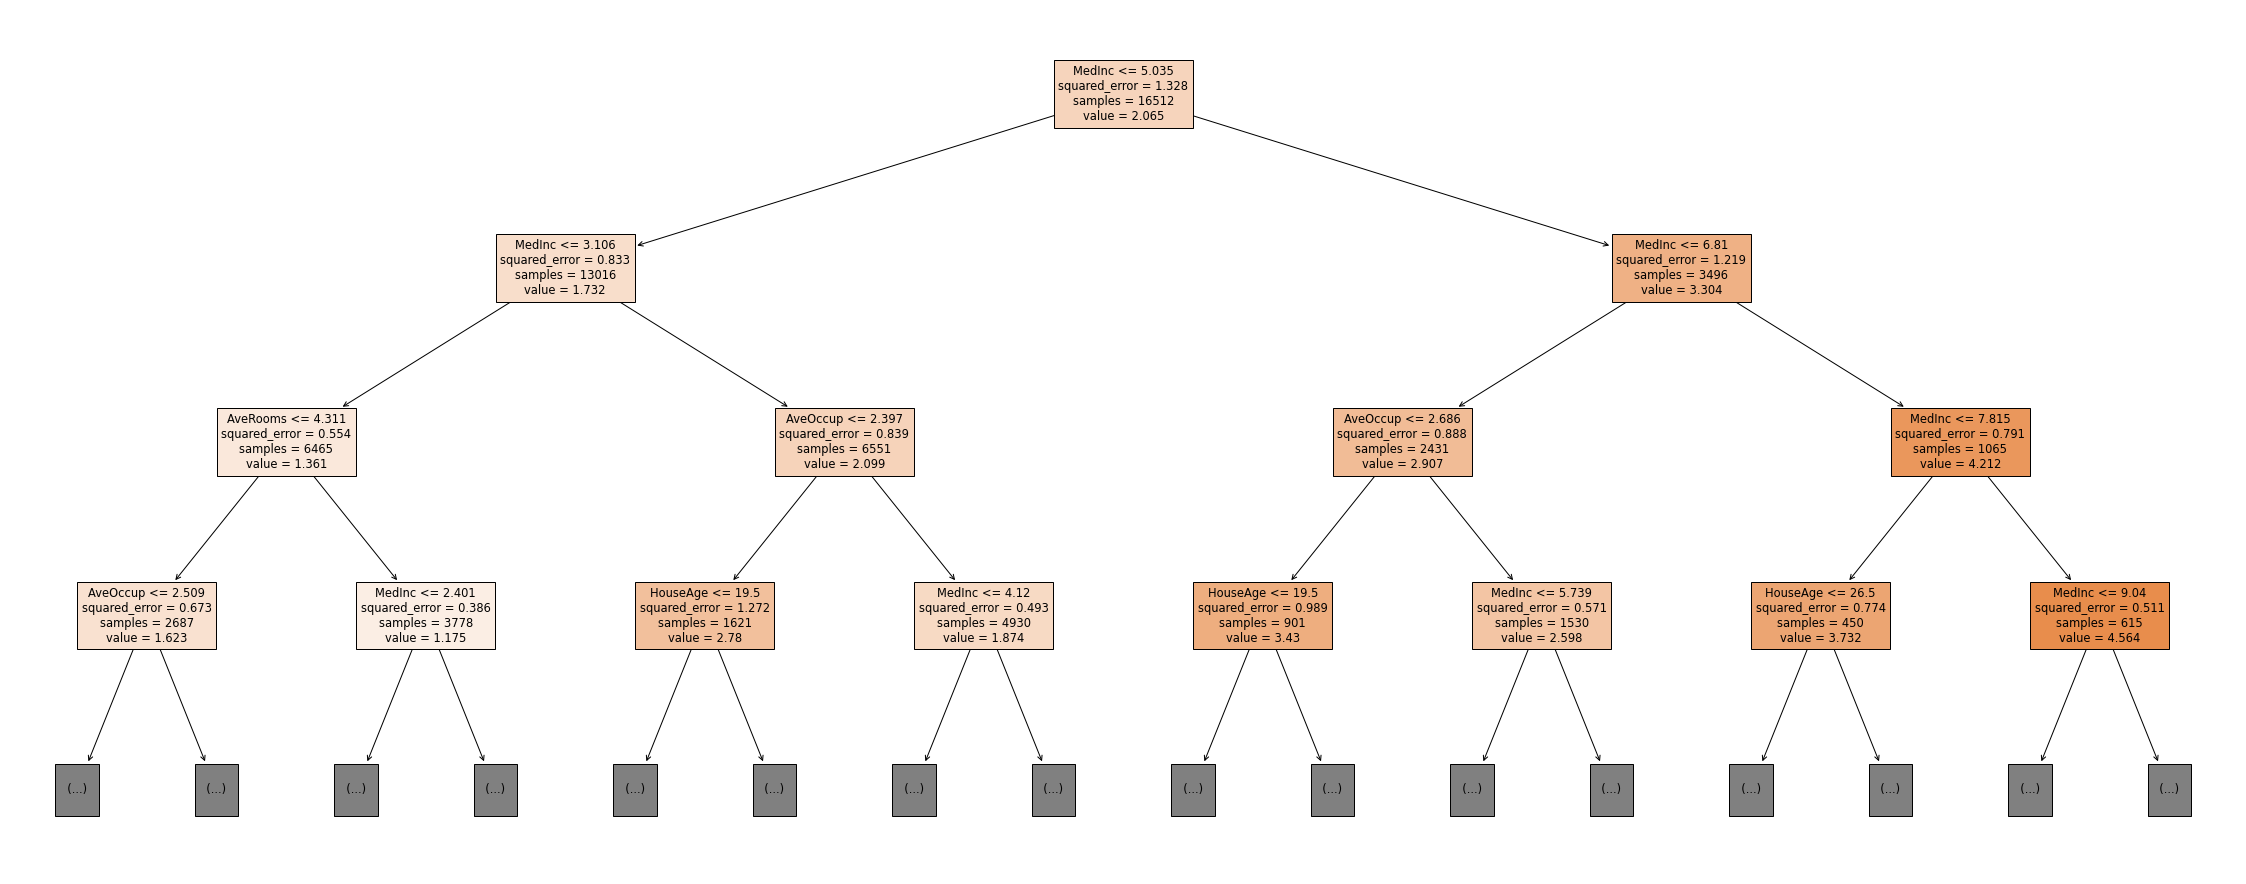

In [17]:
plt.figure(figsize=(40,16))
_ = tree.plot_tree(optimal_model, 
                   feature_names=list(cleaned_df.columns)[:-1],  
                   class_names=list(cleaned_df.columns)[-1],
                   max_depth=3,
                   filled=True)

Получили что более 60% вопросов модели основываются на признаке MedInc, а это означает что модель переобучилась. Хотя на тестовой выборке хорошие результаты. 

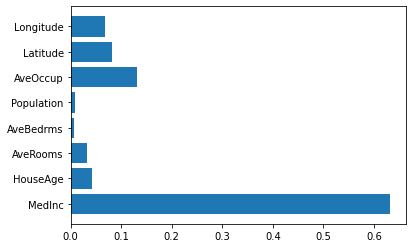

In [18]:
plt.barh(np.arange(len(optimal_model.feature_importances_)), optimal_model.feature_importances_)
plt.yticks(np.arange(len(list(cleaned_df.columns)[:-1])), list(cleaned_df.columns)[:-1])
plt.show()

In [19]:
stat = pd.DataFrame(statistic[1:], columns = statistic[0])
stat

,model,Score_Test,Score_Train
0,LinearRegression,0.601385,0.606821
1,DecisionTree without params,0.586128,1.000000
2,DecisionTree with max 1 depth limit,0.306986,0.310700
3,DecisionTree with max 2 depth limit,0.438234,0.449055
4,DecisionTree with max 3 depth limit,0.524541,0.535242
5,DecisionTree with max 4 depth limit,0.572653,0.584733
6,DecisionTree with max 5 depth limit,0.609485,0.632353
7,DecisionTree with max 6 depth limit,0.642450,0.674904
8,DecisionTree with max 7 depth limit,0.664890,0.715408
9,DecisionTree with max 8 depth limit,0.685627,0.759685


### Выводы

Точность моделей Линейной регресии и дерева без параметров отоичается на ~2% в пользу Линейной регресии. При нахождении оптимальной глубины дерева метрика повышается на ~8% по отношению к линейной регресии и на ~10% по отношению к дереву без парметров. Дерево с потимальными параметрами лучше на ~10% процентов наших первоночальных моделей.

В ходе этой работы видно что не проводя особо никаких манипуляций с данными мы можем повысить качество модели засчет изменения её параметров. Поэтому один из плюсов деревьев это работа с сырыми данными.

Плюсы:
1. Легко вывести и посмотреть наше дерево на экране.
2. Логически понятые правила.
3. Можно выявить как и какие признаки оказывают влияние на предсказание.

Минусы:
1. Легко переобучается. Наша первая модель дерева переобучилась.
2. Неустойчивость к шумам. В зависимости от выборки мы могли получить сильно отличающиеся результаты.

### Вопросы

1. Судя по последнему графику выбранная мной потимальная модель переобучилась? Так как признак MedInc при построении дерева используется более чем в 60% вопросах. Причем что изначально этот показатель был меньше.